In [ ]:
import os

In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

100% 653M/656M [00:31<00:00, 19.1MB/s]
100% 656M/656M [00:31<00:00, 22.0MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile("/content/animal-image-dataset-90-different-animals.zip") as zip_file:
  zip_file.extractall(path='/content/data')

In [ ]:
path = "/content/data/animals/animals"
for folder in os.listdir(path):
  folder_path = path+f"/{folder}/"
  for image in os.listdir(folder_path):
    image_path = folder_path + image
    print(image_path)

In [ ]:
import cv2
import matplotlib.pyplot as plt

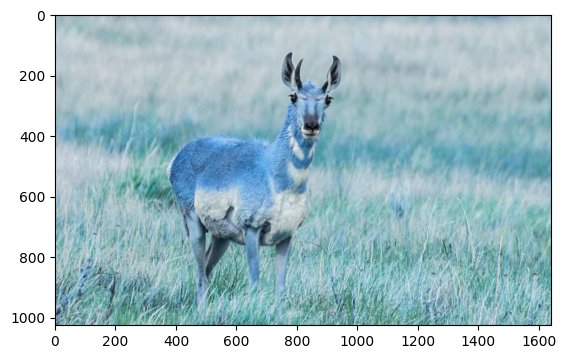

In [ ]:
img = cv2.imread("/content/data/animals/animals/antelope/02f4b3be2d.jpg")
plt.imshow(img)

In [ ]:
img = cv2.resize(img,(224,224))

In [ ]:
import tensorflow as tf
import keras

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='max'
)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
img

array([[[159, 180, 188],
        [157, 178, 186],
        [158, 181, 189],
        ...,
        [164, 190, 205],
        [160, 184, 202],
        [156, 180, 198]],

       [[160, 181, 189],
        [159, 180, 188],
        [156, 182, 188],
        ...,
        [173, 195, 207],
        [165, 187, 201],
        [165, 182, 198]],

       [[159, 180, 188],
        [161, 182, 190],
        [155, 181, 187],
        ...,
        [178, 196, 207],
        [173, 192, 200],
        [177, 193, 205]],

       ...,

       [[154, 181, 189],
        [ 68, 105, 126],
        [145, 181, 191],
        ...,
        [187, 226, 226],
        [134, 172, 168],
        [165, 198, 197]],

       [[158, 187, 191],
        [ 72, 111, 124],
        [157, 192, 197],
        ...,
        [180, 220, 215],
        [167, 206, 196],
        [156, 194, 193]],

       [[ 71,  99, 105],
        [107, 151, 154],
        [120, 161, 165],
        ...,
        [162, 206, 197],
        [151, 200, 188],
        [111, 161, 163]]

In [ ]:
img = img.reshape((1,224,224,3))

In [ ]:
pred = resnet.predict(img)

1/1 [==============================] - 2s 2s/step


In [ ]:
pred.shape

(1, 2048)

In [ ]:
{"s":[23,45]}

{'s': [23, 45]}

In [ ]:
image_data = []
path = "/content/data/animals/animals"
for folder in os.listdir(path):
  folder_path = path+f"/{folder}/"
  for image_name in os.listdir(folder_path):
    image_content = [folder] #class name of the image
    image_path = folder_path + image_name
    image_content.append(image_path) # appending image path
    image = cv2.imread(image_path)
    if isinstance(image,type(None)):
      continue
    elif image.shape[0]>=224 and image.shape[1]>=224:
      image = cv2.resize(image,(224,224))
      image = image.reshape((1,224,224,3))
      feature = resnet.predict(image)
      image_content.append(feature) # appending features
      image_data.append(image_content)
  print(f"folder: {folder}")

In [ ]:
plt.imshow(cv2.imread(image_data[1][1]))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

1/1 [==============================] - 0s 215ms/step


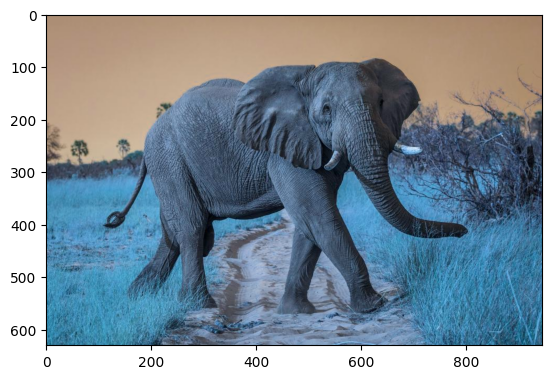

In [ ]:
pred_img = cv2.imread("/content/elephant.jpg")
plt.imshow(pred_img)
pred_img = cv2.resize(pred_img, (224,224))
pred_img = pred_img.reshape((1,224,224,3))
feat_vec = resnet.predict(pred_img)

In [ ]:
len(feat_vec)

1

In [ ]:
def sort_fun(output):
  sorting(output,len(output)-1)
  return
def sorting(output,idx):
  while idx > 0 :
    if output[idx][1] <= output[idx-1][1]:
      return
    else:
      temp = output[idx]
      output[idx] = output[idx-1]
      output[idx-1] = temp
      return sorting(output,idx-1)
  return



In [ ]:
#output image size = 10
output = []
for data in image_data:
  sim = cosine_similarity(data[2],feat_vec)
  if len(output) < 20:
    output.append((data,sim))
    sort_fun(output)
  else:
    if output[-1][1] >= sim:
      continue
    else:
      del output[-1]
      output.append((data,sim))
      sort_fun(output)


In [ ]:
output

[(['elephant',
   '/content/data/animals/animals/elephant/5edec096c0.jpg',
   array([[ 1.3970042, 13.372817 ,  3.398672 , ...,  5.0585275, 10.252861 ,
            9.384141 ]], dtype=float32)],
  array([[0.8139298]], dtype=float32)),
 (['elephant',
   '/content/data/animals/animals/elephant/2cb580feff.jpg',
   array([[ 4.4794106, 23.476643 ,  1.9203459, ...,  4.2772765,  4.077725 ,
           38.92717  ]], dtype=float32)],
  array([[0.8013742]], dtype=float32)),
 (['elephant',
   '/content/data/animals/animals/elephant/26d834d229.jpg',
   array([[ 3.7550433 , 21.385765  ,  0.26103568, ...,  5.454564  ,
            3.650409  , 21.019583  ]], dtype=float32)],
  array([[0.7942399]], dtype=float32)),
 (['elephant',
   '/content/data/animals/animals/elephant/7ff62f898d.jpg',
   array([[ 3.4245014, 14.925011 ,  1.1446519, ...,  2.2705464,  6.921993 ,
            8.020618 ]], dtype=float32)],
  array([[0.77539694]], dtype=float32)),
 (['elephant',
   '/content/data/animals/animals/elephant/12b

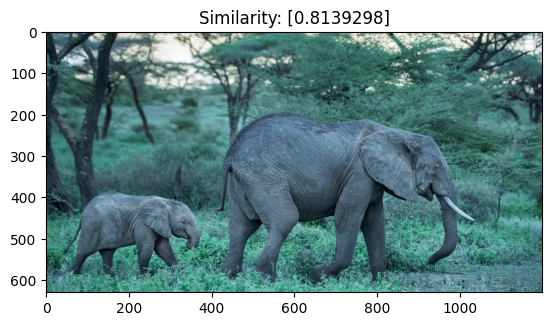

In [ ]:
img = cv2.imread(output[0][0][1])
plt.title(f'Similarity: {output[0][1][0]}')
plt.legend()
plt.imshow(img)

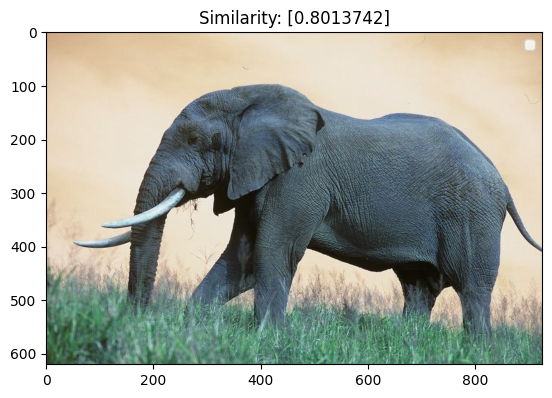

In [ ]:
img = cv2.imread(output[1][0][1])
plt.title(f'Similarity: {output[1][1][0]}')
plt.legend()
plt.imshow(img)

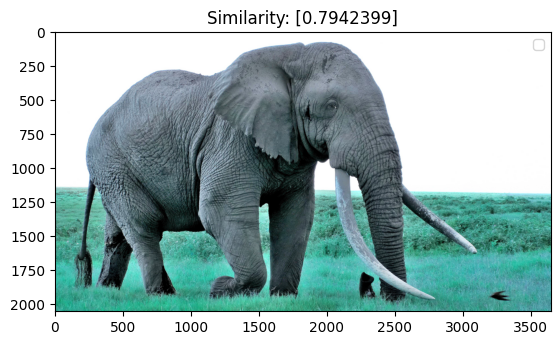

In [ ]:
img = cv2.imread(output[2][0][1])
plt.title(f'Similarity: {output[2][1][0]}')
plt.legend()
plt.imshow(img)

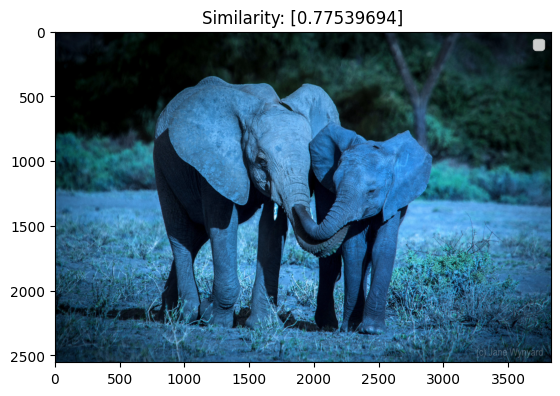

In [ ]:
img = cv2.imread(output[3][0][1])
plt.title(f'Similarity: {output[3][1][0]}')
plt.legend()
plt.imshow(img)

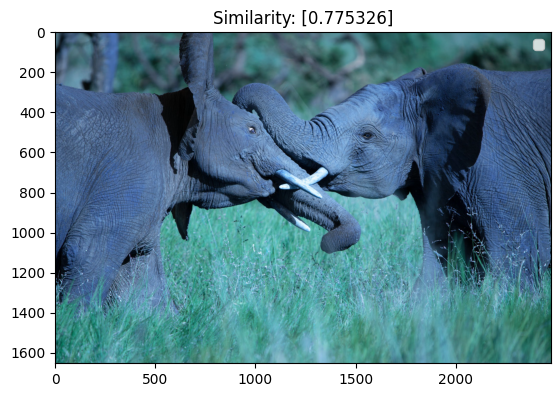

In [ ]:
img = cv2.imread(output[4][0][1])
plt.title(f'Similarity: {output[4][1][0]}')
plt.legend()
plt.imshow(img)

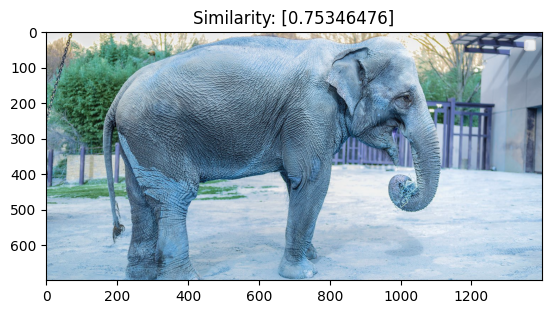

In [ ]:
img = cv2.imread(output[12][0][1])
plt.title(f'Similarity: {output[12][1][0]}')
plt.legend()
plt.imshow(img)

In [ ]:
import pickle
with open("/content/feature_list_as_pkl","wb") as f:
  pickle.dump(image_data,f)

In [ ]:
with open("/content/feature_list_as_pkl", "rb") as f:
  l = pickle.load(f)